In [34]:
'''
Basic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

'\nBasic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py\n\nTrains a simple deep NN on the MNIST dataset.\n\nGets to 98.40% test accuracy after 20 epochs\n(there is *a lot* of margin for parameter tuning).\n2 seconds per epoch on a K520 GPU.\n'

# FeedForward Network

In [35]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt

## Prepare Data

In [36]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [37]:
def test_model(model):
    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))


    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history 

## No Hidden Layers

In [38]:
no_hidden_model = Sequential()
no_hidden_model.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

no_hidden_history = test_model(no_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.6040 - acc: 0.8472 - val_loss: 0.3442 - val_acc: 0.9068
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3313 - acc: 0.9079 - val_loss: 0.2987 - val_acc: 0.9167
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3020 - acc: 0.9162 - val_loss: 0.2864 - val_acc: 0.9199
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.2885 - acc: 0.9187 - val_loss: 0.2798 - val_acc: 0.9218
Epoch 5/20
60000/60000 [==============================] - 1s 13us/step

# One Hidden Layer

In [39]:
one_hidden_model = Sequential()
one_hidden_model.add(Dense(800, activation='relu', input_shape=(784,)))
# one_hidden_model.add(Dropout(0.2))
one_hidden_model.add(Dense(num_classes, activation='softmax'))

one_hidden_history = test_model(one_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2426 - acc: 0.9287 - val_loss: 0.1081 - val_acc: 0.9677
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0941 - acc: 0.9721 - val_loss: 0.0777 - val_acc: 0.9770
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0601 - acc: 0.9824 - val_loss: 0.0864 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step 

# Two Hidden Layers

In [40]:
two_hidden_model = Sequential()
two_hidden_model.add(Dense(512, activation='relu', input_shape=(784,)))
# two_hidden_model.add(Dropout(0.2))
two_hidden_model.add(Dense(512, activation='relu'))
# two_hidden_model.add(Dropout(0.2))
two_hidden_model.add(Dense(num_classes, activation='softmax'))

two_hidden_history = test_model(two_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2187 - acc: 0.9321 - val_loss: 0.1299 - val_acc: 0.9602
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0806 - acc: 0.9752 - val_loss: 0.0795 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - los

## Three Hidden Layers

In [41]:
three_hidden_model = Sequential()
three_hidden_model.add(Dense(800, activation='relu', input_shape=(784,)))
# three_hidden_model.add(Dropout(0.2))
three_hidden_model.add(Dense(400, activation='relu'))
# three_hidden_model.add(Dropout(0.2))
three_hidden_model.add(Dense(200, activation='relu'))
# three_hidden_model.add(Dropout(0.2))
three_hidden_model.add(Dense(num_classes, activation='softmax'))

three_hidden_history = test_model(three_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_41 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_42 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2010      
Total params: 1,030,610
Trainable params: 1,030,610
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.2326 - acc: 0.9272 - val_loss: 0.1018 - val_acc: 0.9701
Epoch 2/20
60000/60000 [==============================] - 8s 135us/step - lo

## Plotting

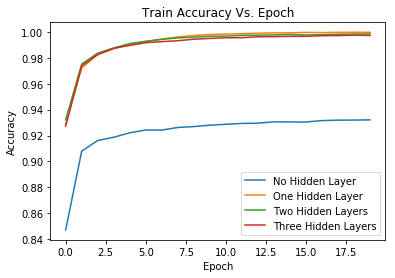

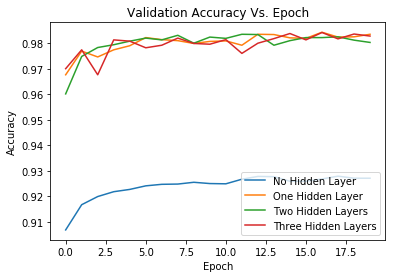

In [42]:
plt.figure(1)
plt.title("Train Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
# summarize history for accuracy  
plt.plot(no_hidden_history.history['acc']) 
plt.plot(one_hidden_history.history['acc']) 
plt.plot(two_hidden_history.history['acc'])
plt.plot(three_hidden_history.history['acc'])
plt.legend(['No Hidden Layer', 'One Hidden Layer', 'Two Hidden Layers', 'Three Hidden Layers'], loc='lower right') 

plt.figure(2)
plt.title("Validation Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
# summarize history for accuracy  
plt.plot(no_hidden_history.history['val_acc']) 
plt.plot(one_hidden_history.history['val_acc']) 
plt.plot(two_hidden_history.history['val_acc'])
plt.plot(three_hidden_history.history['val_acc'])
plt.legend(['No Hidden Layer', 'One Hidden Layer', 'Two Hidden Layers', 'Three Hidden Layers'], loc='lower right') 